In [5]:
# read data, compulsory
import json

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Draw
from matplotlib import pyplot as plt
# import torch

# variables
data_path = '/mlx_devbox/users/howard.wang/playground/molllm/datasets/dataset_close_7_index_rmo3.json'

with open(data_path) as f:
    data = json.load(f)
print(type(data))
print(data.keys())

# predictions = list(data['targets']['predictions'].reshape(-1).numpy())
# targets = data['targets']['targets']

<class 'dict'>
dict_keys(['all_ps', 'absorption', 'emission', 'hl_gap', 'soqy', 'flqy', 'phosphorescence_peak'])


# Sizes

In [7]:
all_smiles = [s[-1] for s in data['all_ps']]
all_mw = []
all_atoms = []
all_rings = []
for smiles in all_smiles:
    mol = Chem.MolFromSmiles(smiles)
    all_mw.append(rdMolDescriptors.CalcExactMolWt(mol))
    all_atoms.append(rdMolDescriptors.CalcNumAtoms(mol))
    all_rings.append(rdMolDescriptors.CalcNumRings(mol))

[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not removing hydrogen atom without neighbors
[16:22:35] WARNING: not r

In [8]:
print(min(all_mw), max(all_mw))
print(min(all_atoms), max(all_atoms))
print(min(all_rings), max(all_rings))

110.08439831999999 2778.8976503200006
15 387
3 37


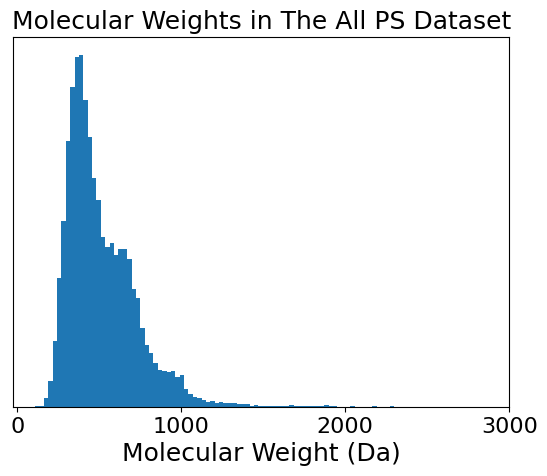

In [9]:
# all_mw = [m for m in all_mw if m < 10000]
# print(max(all_mw))
# print(len([m for m in all_mw if m > 2000]))
# plt.figure(figsize=(3.2, 2.4))
ax1 = plt.subplot()
ax1.hist(all_mw, bins=100, density=True, label='MW')
ax1.set_yticks([])
ax1.set_xticks([0, 1000, 2000, 3000], [0, 1000, 2000, 3000], fontsize=16)
ax1.set_xlabel('Molecular Weight (Da)', fontsize=18)
ax1.set_title('Molecular Weights in The All PS Dataset', fontsize=18)
plt.show()

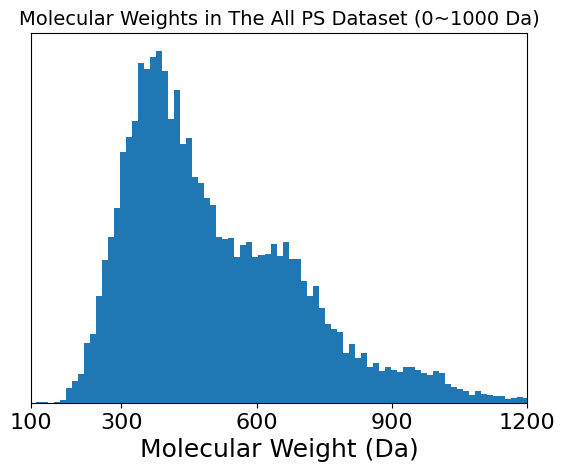

In [11]:
# all_mw = [m for m in all_mw if m < 10000]
ax1 = plt.subplot()
ax1.hist(all_mw, bins=200, density=True, label='MW')
ax1.set_xlim(100, 1000)
ax1.set_yticks([])
ax1.set_xticks([100, 300, 600, 900, 1200], [100, 300, 600, 900, 1200], fontsize=16)
ax1.set_xlabel('Molecular Weight (Da)', fontsize=18)
ax1.set_title('Molecular Weights in The All PS Dataset (0~1000 Da)', fontsize=14)
plt.show()

# Labels

absorption 162.0 1026.0
emission 247.0 1050.0
13.07453347
hl_gap 0.35102706 7.91
soqy 0.0 0.99
flqy 0.0 1.0


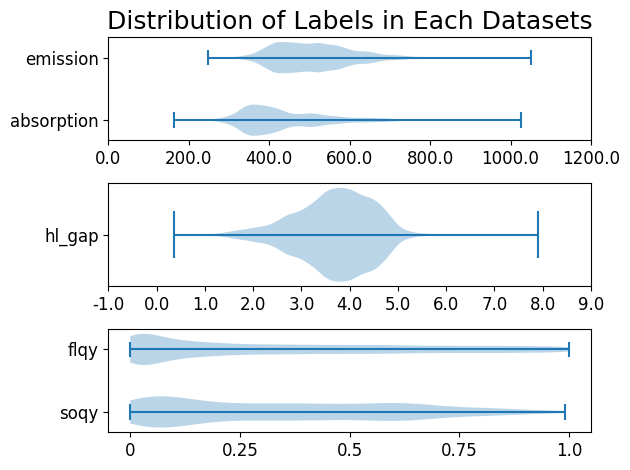

In [19]:
labels_list = ['absorption', 'emission'], ['hl_gap'], ['soqy', 'flqy']
all_labels = {}
ax1 = plt.subplot(3,1,1)
for k, v in data.items():
    if k not in labels_list[0]:
        continue
    labels = [a[-1] for a in v]
    # if k == 'emission':
    #     lmin = labels.index(65.0)
    #     lmax = labels.index(513625.0)
    #     labels[lmin] = 656.0
    #     labels[lmax] = 625.0
    all_labels[k] = labels
    print(k, min(labels), max(labels))
ax1.violinplot(all_labels.values(), vert=False)
ax1.set_yticks([1,2], labels_list[0], fontsize=12)
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticks(), fontsize=12)

all_labels = {}
ax2 = plt.subplot(3,1,2)
for k, v in data.items():
    if k not in labels_list[1]:
        continue
    labels = [a[-1] for a in v]
    print(labels.pop(7220))
    all_labels[k] = labels
    print(k, min(labels), max(labels))
ax2.violinplot(all_labels.values(), vert=False)
ax2.set_yticks([1], labels_list[1], fontsize=12)
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticks(), fontsize=12)

all_labels = {}
ax3 = plt.subplot(3,1,3)
for k, v in data.items():
    if k not in labels_list[2]:
        continue
    labels = [a[-1] for a in v]
    all_labels[k] = labels
    print(k, min(labels), max(labels))
ax3.violinplot(all_labels.values(), vert=False)
ax3.set_yticks([1,2], labels_list[2], fontsize=12)
ax3.set_xticks([0, 0.25, 0.5, 0.75, 1.0], [0, 0.25, 0.5, 0.75, 1.0], fontsize=12)

ax1.set_title('Distribution of Labels in Each Datasets', fontsize=18)

plt.tight_layout()
plt.show()

In [71]:
print(len([a[-1] for a in data['emission'] if a[-1] < 300]))
print([a for a in data['emission'] if a[-1] < 200])

21
[['emission_23240', 'O=C(O)C(C=C9)=CC=C9\\C(C(C=C5)=N/C5=C3C4=CC=[N+](C)C=C4)=C(N6)/C=C/C6=C(C7=CC=[N+](C)C=C7)/C2=N/C(C=C2)=C(C8=CC=[N+](C)C=C8)\\C1=CC=C\\3N1', 'CO', 65.0]]


In [75]:
print(len([a[-1] for a in data['absorption'] if a[-1] > 1000]))
print([a for a in data['absorption'] if a[-1] > 1000])

2
[['absorption_00723', 'CN(C)C1=CC=C(C(/C=C/C(CCC/2)=C(Cl)C2=C\\C=C3C4=CC=C(N(C)C)C=C4OC(C5=CC=CC=C5)=C\\3)=CC(C6=CC=CC=C6)=[O+]7)C7=C1', 'C(Cl)Cl', 1026.0], ['absorption_18102', '[O-]c1c(-c2ccccc2)cc(-[n+]2c(-c3ccccc3)cc(-c3ccccc3)cc2-c2ccccc2)cc1-c1ccccc1', 'gas', 1055.01845]]


In [78]:
print(len([a[-1] for a in data['hl_gap'] if a[-1] < 0]))
print([a for a in data['hl_gap'] if a[-1] < 0])
print(data['hl_gap'][14198:14200])

1
[['hl_gap_14197', 'CC(C)(C1=CC=C(C2=C(N(C(C3=C(C=CC(N(C)C)=C3)Br)=C2)[B-]4(F)F)N=C5[N+]4=C(C=C5C6=CC=C(C=C6)C(C)(C)C)C7=CC(N(C)C)=CC=C7Br)C=C1)C', -9.6]]
[['hl_gap_14198', 'CC(C)(C1=CC=C(C2=C(N(C(C3=C(C=C(C(N(C)C)=C3)Br)Br)=C2)[B-]4(F)F)N=C5[N+]4=C(C=C5C6=CC=C(C=C6)C(C)(C)C)C7=CC(N(C)C)=C(C=C7Br)Br)C=C1)C', 1.6399999999999997], ['hl_gap_14199', 'F[B-]2(F)N1C(C6=CC=C([H])C=C6)=CC(C5=CC(C8=CC=CC=C8N9CC)=C9C=C5)=C1N=C3[N+]2=C(C7=CC=C([H])C=C7)C=C3C4=CC(C%10=CC=CC=C%10N%11CC)=C%11C=C4', 1.4620000000000002]]


In [15]:
print(len([a[-1] for a in data['flqy'] if a[-1] > 1]))
print([a for a in data['flqy'] if a[-1] > 1])
# print(data['hl_gap'][14198:14200])

2
[['flqy_17513', 'OCCOCCOOC1=CC(/C(C6=N/C(C=C6)=C4C5=CC=C(C%11=[S]C(C(C=C%21)=CC=C%21/C(C%13=CC=C%14N%13[Zn]N/%17/C(C=CC%17=C%18C%19=CC(OOCCOCCO)=CC(OOCCOCCO)=C%19)=C(C%20=CC(OOCCCCCO)=CC(OOCCOCCO)=C%20)\\C(C=C%16)=N/C%16=C%14/C%15=CC(OOCCOCCO)=CC(OOCCOCCO)=C%15)=C%12/N=C\\%18C=C%12)C=C%11)C=C5)=C(C=C8)/N3/C8=C(C9=CC(OOCCCCCO)=CC(OOCCOCCO)=C9)\\C(C=C7)=N/C7=C(C%10=CC(OOCCOCCO)=CC(OOCCOCCO)=C%10)\\C2=CC=C\\4N2[Zn]3)=CC(OOCCOCCO)=C1', 'CO', 15.4], ['flqy_17514', 'OCCOCCOOC1=CC(/C(C6=N/C(C=C6)=C4C5=CC=C(C%11=[S]C(C(C=C%21)=CC=C%21/C(C%13=CC=C%14N%13[Zn]N/%17/C(C=CC%17=C%18C%19=CC(OOCCOCCO)=CC(OOCCOCCO)=C%19)=C(C%20=CC(OOCCCCCO)=CC(OOCCOCCO)=C%20)\\C(C=C%16)=N/C%16=C%14/C%15=CC(OOCCOCCO)=CC(OOCCOCCO)=C%15)=C%12/N=C\\%18C=C%12)C=C%11)C=C5)=C(C=C8)/N3/C8=C(C9=CC(OOCCCCCO)=CC(OOCCOCCO)=C9)\\C(C=C7)=N/C7=C(C%10=CC(OOCCOCCO)=CC(OOCCOCCO)=C%10)\\C2=CC=C\\4N2[Zn]3)=CC(OOCCOCCO)=C1', 'C(Cl)(Cl)Cl', 14.9]]


In [17]:
print(data['hl_gap'][7220])
sorted_hl_gap = sorted(data['hl_gap'], key=lambda x: x[-1], reverse=True)
print(sorted_hl_gap[:5])

['hl_gap_07220', 'CC(F)(F)F', 13.07453347]
[['hl_gap_07220', 'CC(F)(F)F', 13.07453347], ['hl_gap_14164', 'F[B-](F)(N1C(C2=CC=C(C=C2)[N+]([O-])=O)=C3I)[N+]4=C(C(I)=C(C4=NC1=C3C5=CC=CC=C5)C6=CC=CC=C6)C7=CC=C(C=C7)[N+]([O-])=O', 7.91], ['hl_gap_14166', 'F[B-](F)(N1C(C2=CC=C(C=C2)[N+]([O-])=O)=C3I)[N+]4=C(C(I)=C(C4=NC1=C3C5=CC=C(C=C5)C(C)(C)C)C6=CC=C(C=C6)C(C)(C)C)C7=CC=C(C=C7)[N+]([O-])=O', 7.81], ['hl_gap_14167', 'F[B-](F)(N1C(C2=CC=C(C=C2)C(C)(C)C)=C3I)[N+]4=C(C(I)=C(C4=NC1=C3C5=CC=C(C=C5)[N+]([O-])=O)C6=CC=C(C=C6)[N+]([O-])=O)C7=CC=C(C=C7)C(C)(C)C', 7.66], ['hl_gap_14165', 'F[B-](F)(N1C(C2=CC=C(C=C2)[N+]([O-])=O)=C3I)[N+]4=C(C(I)=C(C4=NC1=C3C5=CC=C(C=C5)[N+]([O-])=O)C6=CC=C(C=C6)[N+]([O-])=O)C7=CC=C(C=C7)[N+]([O-])=O', 7.609999999999999]]
